In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
pd.set_option('display.max_rows', None)
# train_df.isnull().sum()

In [4]:
# #Proccecing NaN

# LotFrontage median
train_df['LotFrontage'].fillna(train_df['LotFrontage'].dropna().median(), inplace=True)
test_df['LotFrontage'].fillna(test_df['LotFrontage'].dropna().median(), inplace=True)

# Alley 2
train_df['Alley'].fillna('Na', inplace=True)
test_df['Alley'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['Alley'] = dataset['Alley'].map({'Grvl': 0, 'Pave': 1, 'Na': 2})

# MasVnrType freq
# MasVnrArea 0(freq)
freq_MasVnrType = train_df.MasVnrType.dropna().mode()[0]
for dataset in combine:
    dataset['MasVnrType'] = dataset['MasVnrType'].fillna(freq_MasVnrType)
    dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0).astype(int)

# BsmtQual 5
train_df['BsmtQual'].fillna('Na', inplace=True)
test_df['BsmtQual'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['BsmtQual'] = dataset['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na': 0})

# BsmtCond 5
train_df['BsmtCond'].fillna('Na', inplace=True)
test_df['BsmtCond'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['BsmtCond'] = dataset['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na': 0})

# BsmtExposure 4
train_df['BsmtExposure'].fillna('Na', inplace=True)
test_df['BsmtExposure'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['BsmtExposure'] = dataset['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'Na': 0})

# BsmtFinType1 6
train_df['BsmtFinType1'].fillna('Na', inplace=True)
test_df['BsmtFinType1'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['BsmtFinType1'] = dataset['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'Na': 0})
    
# BsmtFinType2 6
train_df['BsmtFinType2'].fillna('Na', inplace=True)
test_df['BsmtFinType2'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['BsmtFinType2'] = dataset['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'Na': 0})
    
# Electrical freq
freq = train_df.Electrical.dropna().mode()[0]
for dataset in combine:
    dataset['Electrical'] = dataset['Electrical'].fillna(freq)
    
# FireplaceQu 5
train_df['FireplaceQu'].fillna('Na', inplace=True)
test_df['FireplaceQu'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['FireplaceQu'] = dataset['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na': 0})
    
# GarageType 6
train_df['GarageType'].fillna('Na', inplace=True)
test_df['GarageType'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['GarageType'] = dataset['GarageType'].map({'2Types': 0, 'Attchd': 1, 'Basment': 2, 'BuiltIn': 3, 'CarPort': 4, 'Detchd': 5, 'Na': 6})
    
# GarageYrBlt median
train_df['GarageYrBlt'].fillna(int(train_df['GarageYrBlt'].dropna().median()), inplace=True)
test_df['GarageYrBlt'].fillna(int(test_df['GarageYrBlt'].dropna().median()), inplace=True)

# GarageFinish 3
train_df['GarageFinish'].fillna('Na', inplace=True)
test_df['GarageFinish'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['GarageFinish'] = dataset['GarageFinish'].map({'Fin': 0, 'RFn': 1, 'Unf': 2, 'Na': 3})
    
# GarageQual 5
train_df['GarageQual'].fillna('Na', inplace=True)
test_df['GarageQual'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['GarageQual'] = dataset['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na': 0})
    
# GarageCond 5
train_df['GarageCond'].fillna('Na', inplace=True)
test_df['GarageCond'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['GarageCond'] = dataset['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na': 0})
    
# PoolQC 4
train_df['PoolQC'].fillna('Na', inplace=True)
test_df['PoolQC'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['PoolQC'] = dataset['PoolQC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Na': 0})
    
# Fence 4
train_df['Fence'].fillna('Na', inplace=True)
test_df['Fence'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['Fence'] = dataset['Fence'].map({'GdPrv': 0, 'MnPrv': 1, 'GdWo': 2, 'MnWw': 3, 'Na': 4})
    
# MiscFeature 5
train_df['MiscFeature'].fillna('Na', inplace=True)
test_df['MiscFeature'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['MiscFeature'] = dataset['MiscFeature'].map({'Elev': 0, 'Gar2': 1, 'Othr': 2, 'Shed': 3, 'TenC': 4, 'Na': 5})

In [5]:
# train_df.isnull().sum()
# test_df.isnull().sum()

In [6]:
# proccecing test nan
# MSZoning freq
freq = test_df.MSZoning.dropna().mode()[0]
for dataset in combine:
    dataset['MSZoning'] = dataset['MSZoning'].fillna(freq)
    
# Utilities freq
freq = test_df.Utilities.dropna().mode()[0]
for dataset in combine:
    dataset['Utilities'] = dataset['Utilities'].fillna(freq)
    
# BldgType freq 
freq = test_df.BldgType.dropna().mode()[0]
for dataset in combine:
    dataset['BldgType'] = dataset['BldgType'].fillna(freq)
    
# Exterior1st freq
freq = test_df.Exterior1st.dropna().mode()[0]
for dataset in combine:
    dataset['Exterior1st'] = dataset['Exterior1st'].fillna(freq)
    
# Exterior2nd freq
freq = test_df.Exterior2nd.dropna().mode()[0]
for dataset in combine:
    dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(freq)
    
# BsmtFinSF1 medium
train_df['BsmtFinSF1'].fillna(int(train_df['BsmtFinSF1'].dropna().median()), inplace=True)
test_df['BsmtFinSF1'].fillna(int(test_df['BsmtFinSF1'].dropna().median()), inplace=True)

# BsmtFinSF2 medium
train_df['BsmtFinSF2'].fillna(int(train_df['BsmtFinSF2'].dropna().median()), inplace=True)
test_df['BsmtFinSF2'].fillna(int(test_df['BsmtFinSF2'].dropna().median()), inplace=True)

# BsmtUnfSF medium
train_df['BsmtUnfSF'].fillna(int(train_df['BsmtUnfSF'].dropna().median()), inplace=True)
test_df['BsmtUnfSF'].fillna(int(test_df['BsmtUnfSF'].dropna().median()), inplace=True)

# TotalBsmtSF mediu
train_df['TotalBsmtSF'].fillna(int(train_df['TotalBsmtSF'].dropna().median()), inplace=True)
test_df['TotalBsmtSF'].fillna(int(test_df['TotalBsmtSF'].dropna().median()), inplace=True)

# BsmtFullBath freq
freq = test_df.BsmtFullBath.dropna().mode()[0]
for dataset in combine:
    dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(freq)
    
# BsmtHalfBath freq
freq = test_df.BsmtHalfBath.dropna().mode()[0]
for dataset in combine:
    dataset['BsmtHalfBath'] = dataset['BsmtHalfBath'].fillna(freq)
    
# KitchenQual freq
freq = test_df.KitchenQual.dropna().mode()[0]
for dataset in combine:
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna(freq)
    
# Functional freq
freq = test_df.Functional.dropna().mode()[0]
for dataset in combine:
    dataset['Functional'] = dataset['Functional'].fillna(freq)
    
# GarageCars freq
freq = test_df.GarageCars.dropna().mode()[0]
for dataset in combine:
    dataset['GarageCars'] = dataset['GarageCars'].fillna(freq)
    
# GarageArea medium 
train_df['GarageArea'].fillna(int(train_df['GarageArea'].dropna().median()), inplace=True)
test_df['GarageArea'].fillna(int(test_df['GarageArea'].dropna().median()), inplace=True)

# SaleType freq
freq = test_df.SaleType.dropna().mode()[0]
for dataset in combine:
    dataset['SaleType'] = dataset['SaleType'].fillna(freq)

In [7]:
pd.set_option('display.max_columns', 81)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,2,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,4,3,1,6,706,1,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0,1,2003.0,1,2,548,3,3,Y,0,61,0,0,0,0,0,4,5,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,2,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,4,3,4,5,978,1,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,3,1,1976.0,1,2,460,3,3,Y,298,0,0,0,0,0,0,4,5,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,2,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,4,3,2,6,486,1,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,3,1,2001.0,1,2,608,3,3,Y,0,42,0,0,0,0,0,4,5,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,2,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,3,4,1,5,216,1,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,4,5,1998.0,2,3,642,3,3,Y,0,35,272,0,0,0,0,4,5,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,2,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,4,3,3,6,655,1,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,1,2000.0,1,3,836,3,3,Y,192,84,0,0,0,0,0,4,5,0,12,2008,WD,Normal,250000


In [8]:
# # Proccecing not num to num
for dataset in combine:
    # MSZoning
    dataset['MSZoning'] = dataset['MSZoning'].map({'A': 0, 'C (all)': 1, 'FV': 2, 'I': 3, 'RH': 4, 'RL': 5, 'RP': 6, 'RM': 7})
    # Street
    dataset['Street'] = dataset['Street'].map({'Grvl': 0, 'Pave': 1})
    # LotShape
    dataset['LotShape'] = dataset['LotShape'].map({'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3})
    #     LandContour
    dataset['LandContour'] = dataset['LandContour'].map({'Lvl': 0, 'Bnk': 1, 'HLS': 2, 'Low': 3})
    #     Utilities
    dataset['Utilities'] = dataset['Utilities'].map({'AllPub': 0, 'NoSewr': 1, 'NoSeWa': 2, 'ELO': 3})
    #     LotConfig
    dataset['LotConfig'] = dataset['LotConfig'].map({'Inside': 0, 'Corner': 1, 'CulDSac': 2, 'FR2': 3, 'FR3': 4})
    #     LandSlope
    dataset['LandSlope'] = dataset['LandSlope'].map({'Gtl': 0, 'Mod': 1, 'Sev': 2})
    #     Neighborhood
    dataset['Neighborhood'] = dataset['Neighborhood'].map({'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5
                                                          , 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'NAmes': 12, 'NoRidge': 13
                                                          , 'NPkVill': 14, 'NridgHt': 15, 'NWAmes': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 
                                                           'SawyerW': 20, 'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24})
    #     Condition1
    dataset['Condition1'] = dataset['Condition1'].map({'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRNn': 3, 'RRAn': 4, 'PosN': 5
                                                          , 'PosA': 6, 'RRNe': 7, 'RRAe': 8})
    #     Condition2
    dataset['Condition2'] = dataset['Condition2'].map({'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRNn': 3, 'RRAn': 4, 'PosN': 5
                                                          , 'PosA': 6, 'RRNe': 7, 'RRAe': 8})
    #     BldgType
    dataset['BldgType'] = dataset['BldgType'].map({'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'TwnhsE': 3, 'Twnhs': 4})
    #     HouseStyle
    dataset['HouseStyle'] = dataset['HouseStyle'].map({'1Story': 0, '1.5Fin': 1, '1.5Unf': 2, '2Story': 3, '2.5Fin': 4, '2.5Unf': 5
                                                          , 'SFoyer': 6, 'SLvl': 7})
    #     RoofStyle
    dataset['RoofStyle'] = dataset['RoofStyle'].map({'Flat': 0, 'Gable': 1, 'Gambrel': 2, 'Hip': 3, 'Mansard': 4, 'Shed': 5})
    #     RoofMatl
    dataset['RoofMatl'] = dataset['RoofMatl'].map({'ClyTile': 0, 'CompShg': 1, 'Membran': 2, 'Metal': 3, 'Roll': 4, 'Tar&Grv': 5
                                                          , 'WdShake': 6, 'WdShngl': 7})
    #     Exterior1st
    dataset['Exterior1st'] = dataset['Exterior1st'].map({'AsbShng': 0, 'AsphShn': 1, 'BrkComm': 2, 'BrkFace': 3, 'CBlock': 4, 'CemntBd': 5
                                                          , 'HdBoard': 6, 'ImStucc': 7, 'MetalSd': 8, 'Other': 9, 'Plywood': 10, 'PreCast': 11, 'Stone': 12, 'Stucco': 13
                                                          , 'VinylSd': 14, 'Wd Sdng': 15, 'WdShing': 16})
    #     Exterior2nd
    dataset['Exterior2nd'] = dataset['Exterior2nd'].map({'AsbShng': 0, 'AsphShn': 1, 'Brk Cmn': 2, 'BrkFace': 3, 'CBlock': 4, 'CmentBd': 5
                                                          , 'HdBoard': 6, 'ImStucc': 7, 'MetalSd': 8, 'Other': 9, 'Plywood': 10, 'PreCast': 11, 'Stone': 12, 'Stucco': 13
                                                          , 'VinylSd': 14, 'Wd Sdng': 15, 'Wd Shng': 16})
    #     MasVnrType
    dataset['MasVnrType'] = dataset['MasVnrType'].map({'BrkCmn': 0, 'BrkFace': 1, 'CBlock': 2, 'None': 3, 'Stone': 4})
    #     ExterQual
    dataset['ExterQual'] = dataset['ExterQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
    #     ExterCond
    dataset['ExterCond'] = dataset['ExterCond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
    #     Foundation
    dataset['Foundation'] = dataset['Foundation'].map({'BrkTil': 0, 'CBlock': 1, 'PConc': 2, 'Slab': 3, 'Stone': 4, 'Wood': 5})
    #     Heating
    dataset['Heating'] = dataset['Heating'].map({'Floor': 0, 'GasA': 1, 'GasW': 2, 'Grav': 3, 'OthW': 4, 'Wall': 5})
    #     HeatingQC
    dataset['HeatingQC'] = dataset['HeatingQC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
    #     CentralAir
    dataset['CentralAir'] = dataset['CentralAir'].map({'N': 0, 'Y': 1})
    #     Electrical
    dataset['Electrical'] = dataset['Electrical'].map({'SBrkr': 0, 'FuseA': 1, 'FuseF': 2, 'FuseP': 3, 'Mix': 4})
    #     KitchenQual
    dataset['KitchenQual'] = dataset['KitchenQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
    #     Functional
    dataset['Functional'] = dataset['Functional'].map({'Typ': 0, 'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5
                                                          , 'Sev': 6, 'Sal': 7})
    #     PavedDrive
    dataset['PavedDrive'] = dataset['PavedDrive'].map({'Y': 0, 'P': 1, 'N': 2})
    #     SaleType
    dataset['SaleType'] = dataset['SaleType'].map({'WD': 0, 'CWD': 1, 'VWD': 2, 'New': 3, 'COD': 4, 'Con': 5
                                                          , 'ConLw': 6, 'ConLI': 7, 'ConLD': 8, 'Oth': 9})
    #     SaleCondition
    dataset['SaleCondition'] = dataset['SaleCondition'].map({'Normal': 0, 'Abnorml': 1, 'AdjLand': 2, 'Alloca': 3, 'Family': 4, 'Partial': 5})
    
# train_df.head()

In [9]:
# # dummy
dummy_key = ['MSZoning','Alley', 'LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
             'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional','GarageType','GarageFinish',
             'PavedDrive','Fence','MiscFeature','SaleType','SaleCondition']
# for i in dummy_key:
train_dummy_df = train_df[['MSZoning','Alley', 'LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
             'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional','GarageType','GarageFinish',
             'PavedDrive','Fence','MiscFeature','SaleType','SaleCondition']]
test_dummy_df = test_df[['MSZoning','Alley', 'LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
             'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional','GarageType','GarageFinish',
             'PavedDrive','Fence','MiscFeature','SaleType','SaleCondition']]
#     dummy_train = pd.get_dummies(train_df[i])
#     dummy_test = pd.get_dummies(test_df[i])
# #     print(dummy_train.head())
#     train_df = train_df.join(dummy_train, how='left',lsuffix='_left', rsuffix='_right')
#     test_df = test_df.join(dummy_test, how='left',lsuffix='_left', rsuffix='_right')
#     train_df = train_df.drop(i, axis=1)
#     test_df = test_df.drop(i, axis=1)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
ohe.fit(train_dummy_df)
dummy_train = pd.DataFrame(ohe.transform(train_dummy_df))
train_df = train_df.drop(dummy_key, axis=1)
train_df = train_df.join(dummy_train, how='left',lsuffix='_left', rsuffix='_right')

ohe.fit(train_dummy_df)
dummy_test = pd.DataFrame(ohe.transform(test_dummy_df))
test_df = test_df.drop(dummy_key, axis=1)
test_df = test_df.join(dummy_test, how='left',lsuffix='_left', rsuffix='_right')
# ohe.fit(test_df)
# test_df = pd.DataFrame(ohe.transform(test_df))
train_df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,...,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192
0,1,60,65.0,8450,1,7,5,2003,2003,196,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,0,2003.0,2,548,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,20,80.0,9600,1,6,8,1976,1976,0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,3,1976.0,2,460,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,60,68.0,11250,1,7,5,2001,2002,162,3,2,4,3,2,6,486,1,0,434,920,4,1,920,866,0,1786,1,0,2,1,3,1,3,6,1,3,2001.0,2,608,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,70,60.0,9550,1,7,5,1915,1970,0,2,2,3,4,1,5,216,1,0,540,756,3,1,961,756,0,1717,1,0,1,0,3,1,3,7,1,4,1998.0,3,642,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,1,8,5,2000,2000,350,3,2,4,3,3,6,655,1,0,490,1145,4,1,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,3,2000.0,3,836,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
train_df.shape

(1460, 246)

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7437043103732257


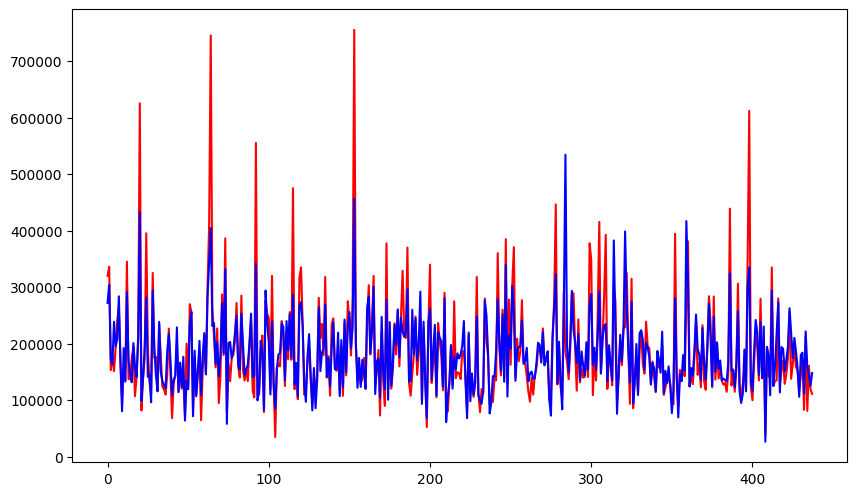

In [12]:
X = train_df.drop(["SalePrice","Id"], axis=1)
Y = train_df["SalePrice"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

regr = LinearSVR(C=1, dual=True, epsilon=1, fit_intercept=True, intercept_scaling=1.0,
          loss='epsilon_insensitive', max_iter=10000, random_state=None,
          tol=0.0001, verbose=0)
regr.fit(x_train, y_train)
pred = regr.predict(x_test)
print(regr.score(x_train, y_train))

plt.figure(figsize=(10,6), dpi=100)
plt.plot(np.array(y_test), c='r')
plt.plot(pred, c='b')
# plt.savefig('all_start_scaling.png')
plt.show()

In [13]:
X_test =  test_df.drop("Id", axis=1)
X_test.head(5)

regr.fit(X, Y)
Y_pred = regr.predict(X_test)
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': Y_pred})
output.to_csv('allfeatures_dummy2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


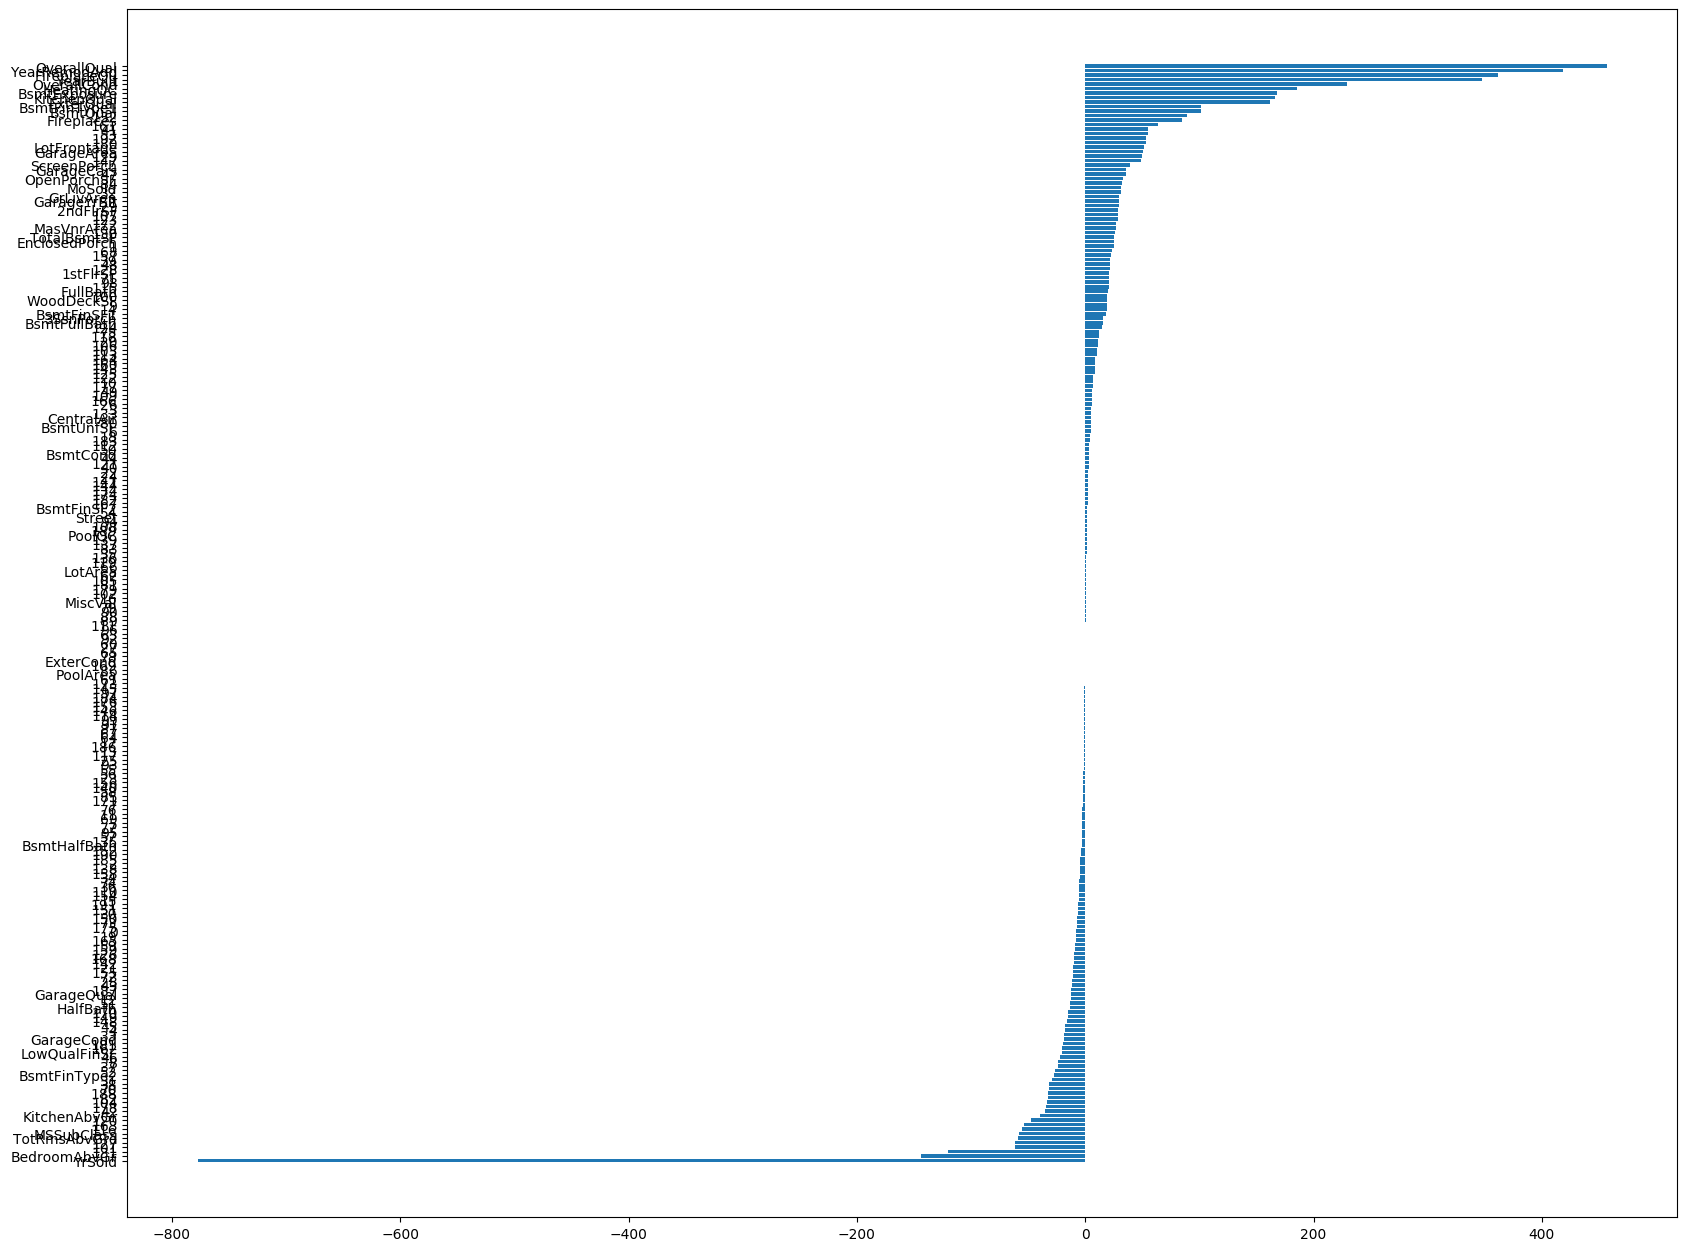

In [14]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(20,16), dpi=100)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = train_df.drop(["SalePrice","Id"], axis=1).columns.values
f_importances(regr.coef_, features_names)